## Experiment: Vary Frequency
First, we test the model to see where it 'breaks' cluster accuracy if frequency is varying within a cluster. We hold amplitude as fixed

## Setup

First, we set up our notebook by downloading the appropriate packages

### Dependencies

In [1]:
pip install matplotlib scipy pandas numpy networkx seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Imports

In [2]:
# base libraries
import importlib
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import os

import networkx as nx

import time

from IPython.utils.io import capture_output # supress outputs

from sklearn.metrics.cluster import adjusted_rand_score

### Fix pathway

In [3]:
# fix directory
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
os.chdir(parent_dir)

print("Current working directory:", os.getcwd())

from trcrpm.src import Hierarchical_TRCRP_Mixture, TRCRP_Mixture

Current working directory: /hdsi-collab-persistent/cephfs/Setup


### Helper Functions

1. **`run_model(data, num_chains = 8, p = 5, MCMC_steps=1000, hyperparam_steps=50, runtime = True)`**
    - **Returns**: Fitted model
        - The dataframe index needs to be reset as an integer.
        - Choose a high number for `MCMC_steps` to allow for a burn-in period.
        - `p` is our lag window

2. **`post_dep(model, num_samples)`**
    - **Returns**: Pairwise posterior dependence matrices (cluster probabilities)
        - The array is of size `NUM_SAMPLES x NUM_CHAINS x LEN(DF) x LEN(DF)`

3. **`clustering(post_probs, threshold = 0.75)`**
    - **Returns**: Clusters
        - If time series `i` and `k` are dependent in `threshold%` of samples, they are clustered together.
        - Averages over `NUM_SAMPLES` and `NUM_CHAINS`.

4. **`return_ari(true_labels, predicted_clusters)`**
    - **Returns**: Adjusted Rand Index (ARI) if ground truth is available


In [4]:
import importlib

In [5]:
import experiments.helper_functions as helpers
importlib.reload(helpers)

<module 'experiments.helper_functions' from '/hdsi-collab-persistent/cephfs/Setup/experiments/helper_functions.py'>

## Results

In [6]:
import experiments.data_generation as data_gen
import experiments.helper_functions as helpers
import experiments.plotting_functions as plotter

In [7]:
importlib.reload(data_gen)

<module 'experiments.data_generation' from '/hdsi-collab-persistent/cephfs/Setup/experiments/data_generation.py'>

### Experiment 1: freq = 0

(50, 50)


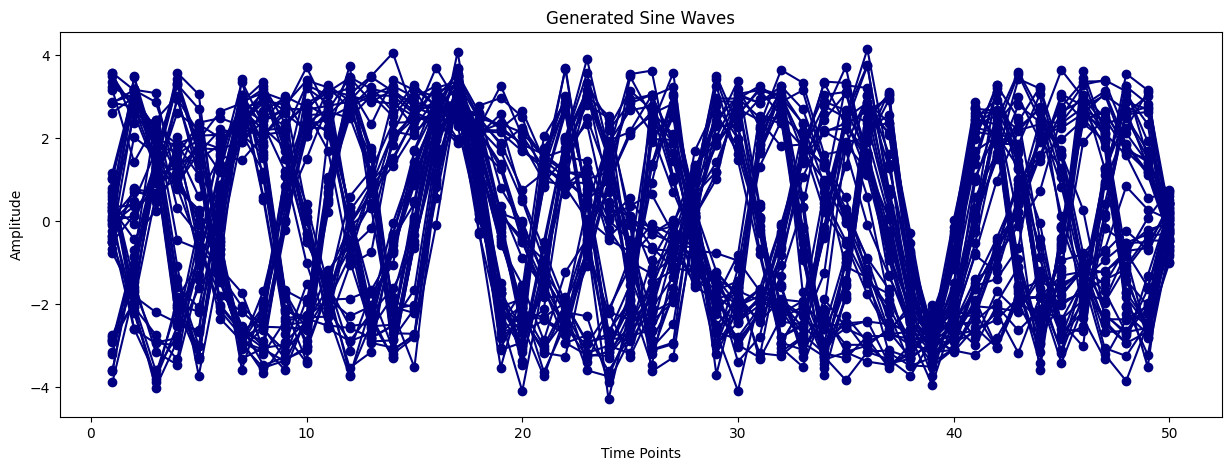

In [8]:
i = 0
df = data_gen.generate_sine_wave_data(frequency_noise=i, fixed_amplitude = 3.0
                                      ,num_clusters = 5, random_state=42, use_colors = False, num_points = 50)

data = df.iloc[1:]
labels = df.iloc[0].values

print(data.shape) # NUM_OBSERVATIONS X NUM_TIMESEREIES

In [9]:
unique_labels = np.unique(labels)
true_clusters = [set(int(item) for item in np.where(labels == label)[0]) for label in unique_labels]
print(true_clusters)

[{0, 35, 5, 40, 10, 45, 15, 20, 25, 30}, {1, 36, 6, 41, 11, 46, 16, 21, 26, 31}, {32, 2, 37, 7, 42, 12, 47, 17, 22, 27}, {33, 3, 38, 8, 43, 13, 48, 18, 23, 28}, {34, 4, 39, 9, 44, 14, 49, 19, 24, 29}]


In [10]:
# # true clusters
# unique_labels = np.unique(labels)
# true_clusters = [set(np.where(labels == label)[0]) for label in unique_labels]
# true_clusters

In [ ]:
# fit the model
model1 = helpers.run_model(data)

# obtain clusters
dep_matrices = helpers.post_dep(model1, 20)
predicted_clusters1 = helpers.clustering(dep_matrices, threshold = 0.75)

# ari
helpers.return_ari(labels, predicted_clusters1)

# printer clusters
predicted_clusters1

### Experiment 2: freq = 0.1



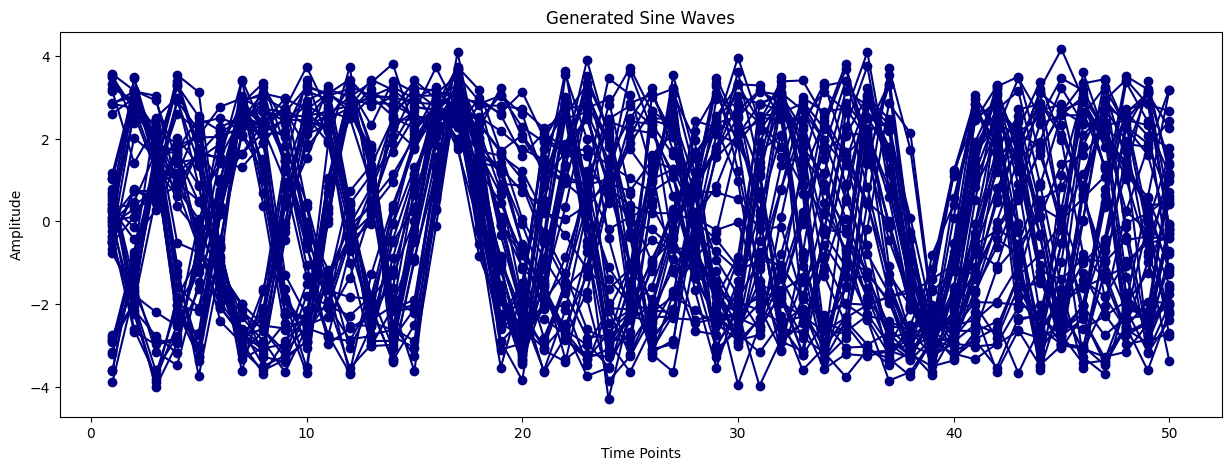

In [9]:
i = 0.1
df = data_gen.generate_sine_wave_data(frequency_noise=i, fixed_amplitude = 3.0
                                      ,num_clusters = 5, random_state=42, use_colors = False, num_points = 50)

In [ ]:
i = 0.1
df = data_gen.generate_sine_wave_data(frequency_noise=i, fixed_amplitude = 3.0
                                      ,num_clusters = 5, random_state=42, use_colors = False, num_points = 50)
data = df.iloc[1:]
labels = df.iloc[0].values

print(data.shape) # NUM_OBSERVATIONS X NUM_TIMESEREIES

# fit the model
model2 = helpers.run_model(data)

# obtain clusters
dep_matrices = helpers.post_dep(model2, 20)
predicted_clusters2 = helpers.clustering(dep_matrices, threshold = 0.75)

# ari
print(helpers.return_ari(labels, predicted_clusters2))

# printer clusters
predicted_clusters2

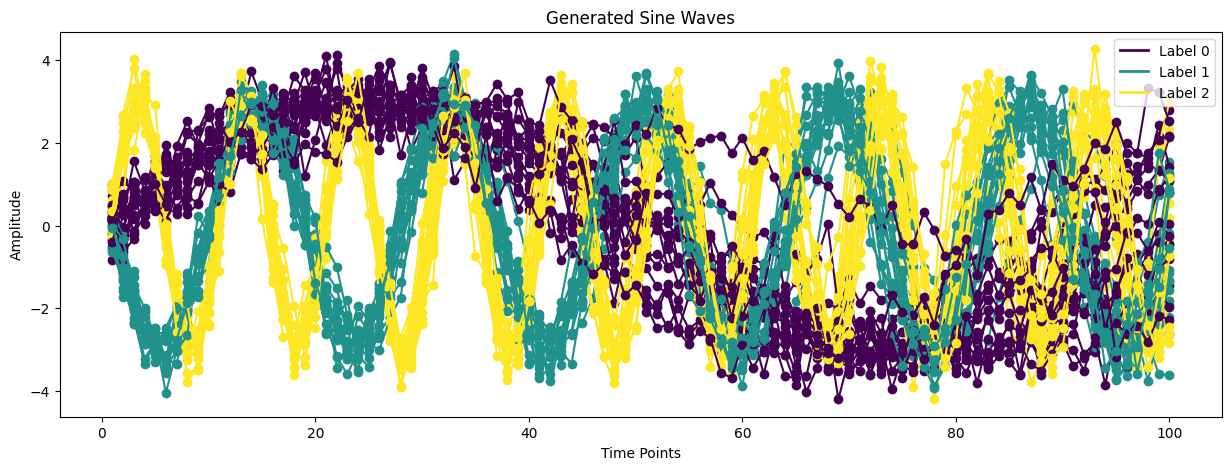

In [21]:
df = data_gen.generate_sine_wave_data(frequency_noise=0.1, fixed_amplitude = 3.0
                                      ,num_clusters = 3, random_state=42, use_colors = True)

### Experiment 3: freq = 0.2

In [ ]:
i = 0.2
df = data_gen.generate_sine_wave_data(frequency_noise=i, fixed_amplitude = 3.0
                                      ,num_clusters = 5, random_state=42, use_colors = False, num_points = 50)
data = df.iloc[1:]
labels = df.iloc[0].values

print(data.shape) # NUM_OBSERVATIONS X NUM_TIMESEREIES

# fit the model
model3 = helpers.run_model(data)

# obtain clusters
dep_matrices = helpers.post_dep(model3, 20)
predicted_clusters3 = helpers.clustering(dep_matrices, threshold = 0.75)

# ari
print(helpers.return_ari(labels, predicted_clusters3))

# printer clusters
predicted_clusters3

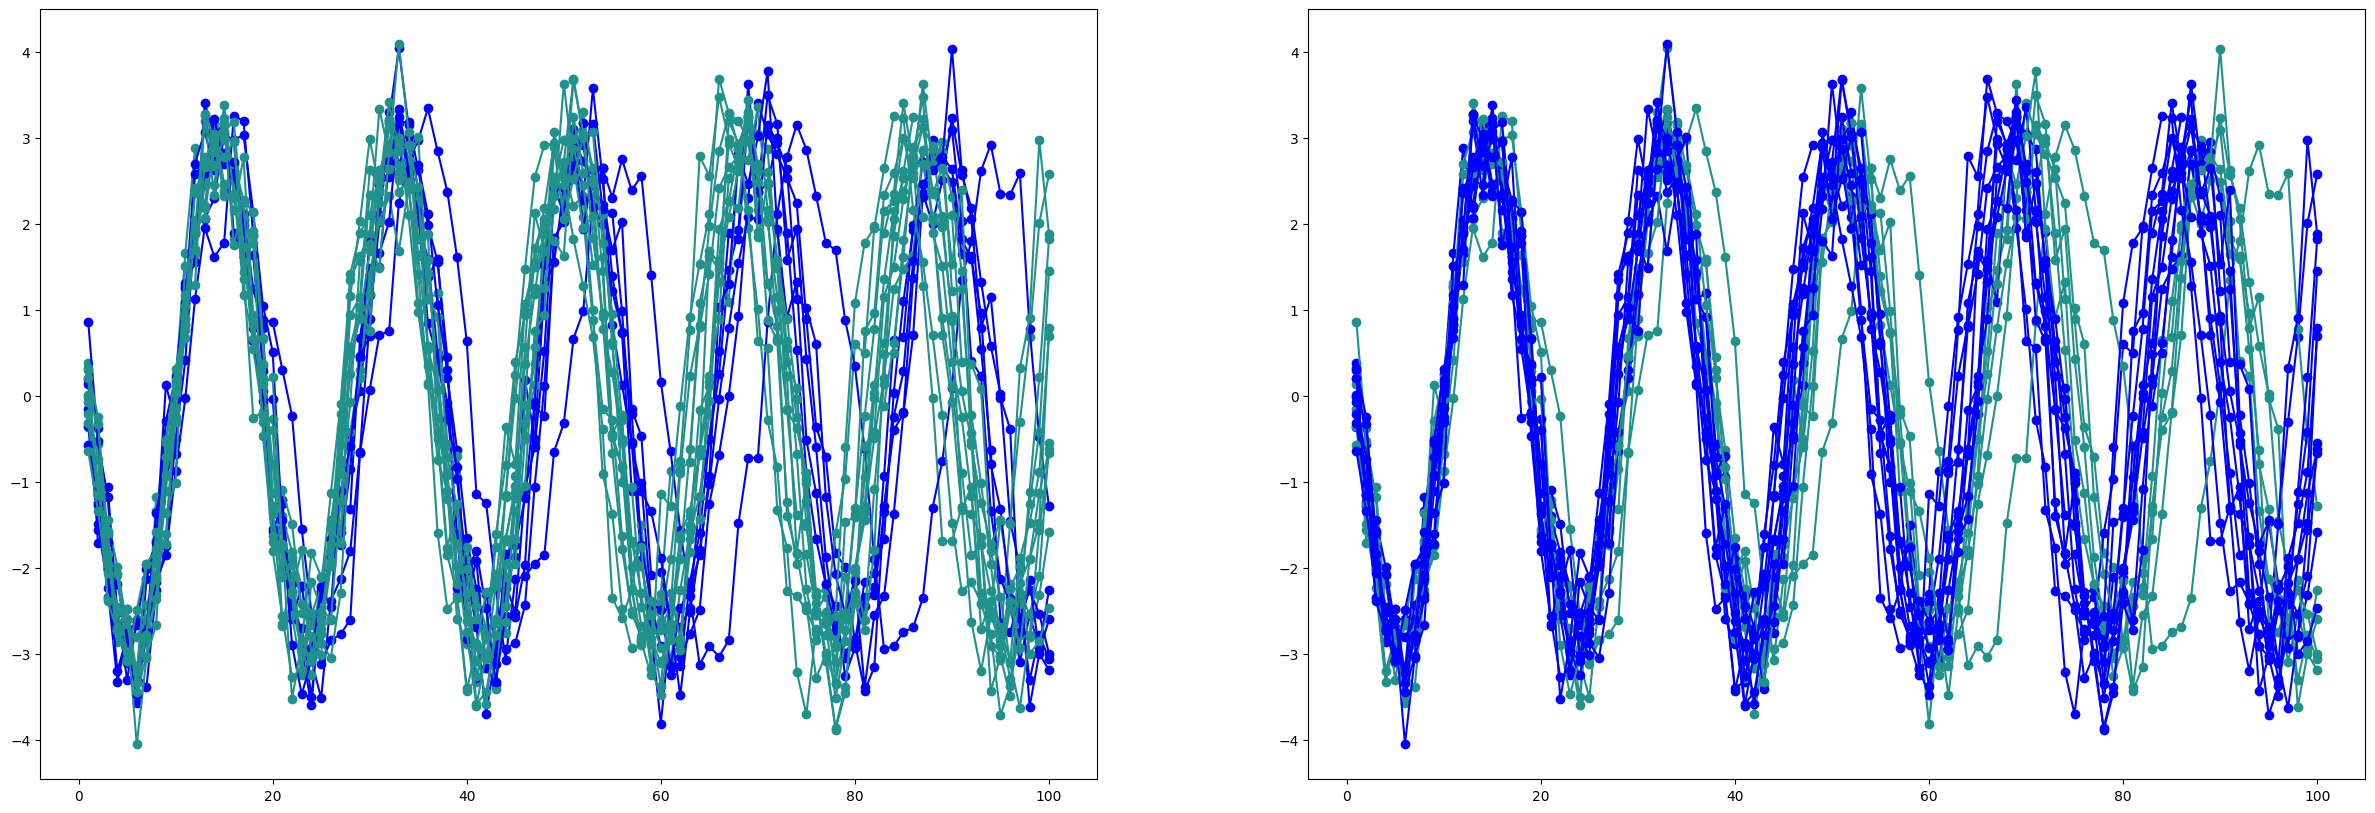

In [14]:
plotter.compare_clusters(model3.dataset, labels, [1], [1, 7, 13, 16, 25, 34], [4, 10, 19, 22, 28, 31, 37, 40, 43, 46, 49])

### Experiment 4: freq = 0.3

In [15]:
true_clusters

[{0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48},
 {1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49},
 {2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47}]

In [ ]:
i = 0.3
df = data_gen.generate_sine_wave_data(frequency_noise=i, fixed_amplitude = 3.0
                                      ,num_clusters = 5, random_state=42, use_colors = False, num_points = 50)
data = df.iloc[1:]
labels = df.iloc[0].values

print(data.shape) # NUM_OBSERVATIONS X NUM_TIMESEREIES

# fit the model
model4 = helpers.run_model(data)

# obtain clusters
dep_matrices = helpers.post_dep(model4, 20)
predicted_clusters4 = helpers.clustering(dep_matrices, threshold = 0.75)

# ari
helpers.return_ari(labels, predicted_clusters4)

# printer clusters
predicted_clusters4

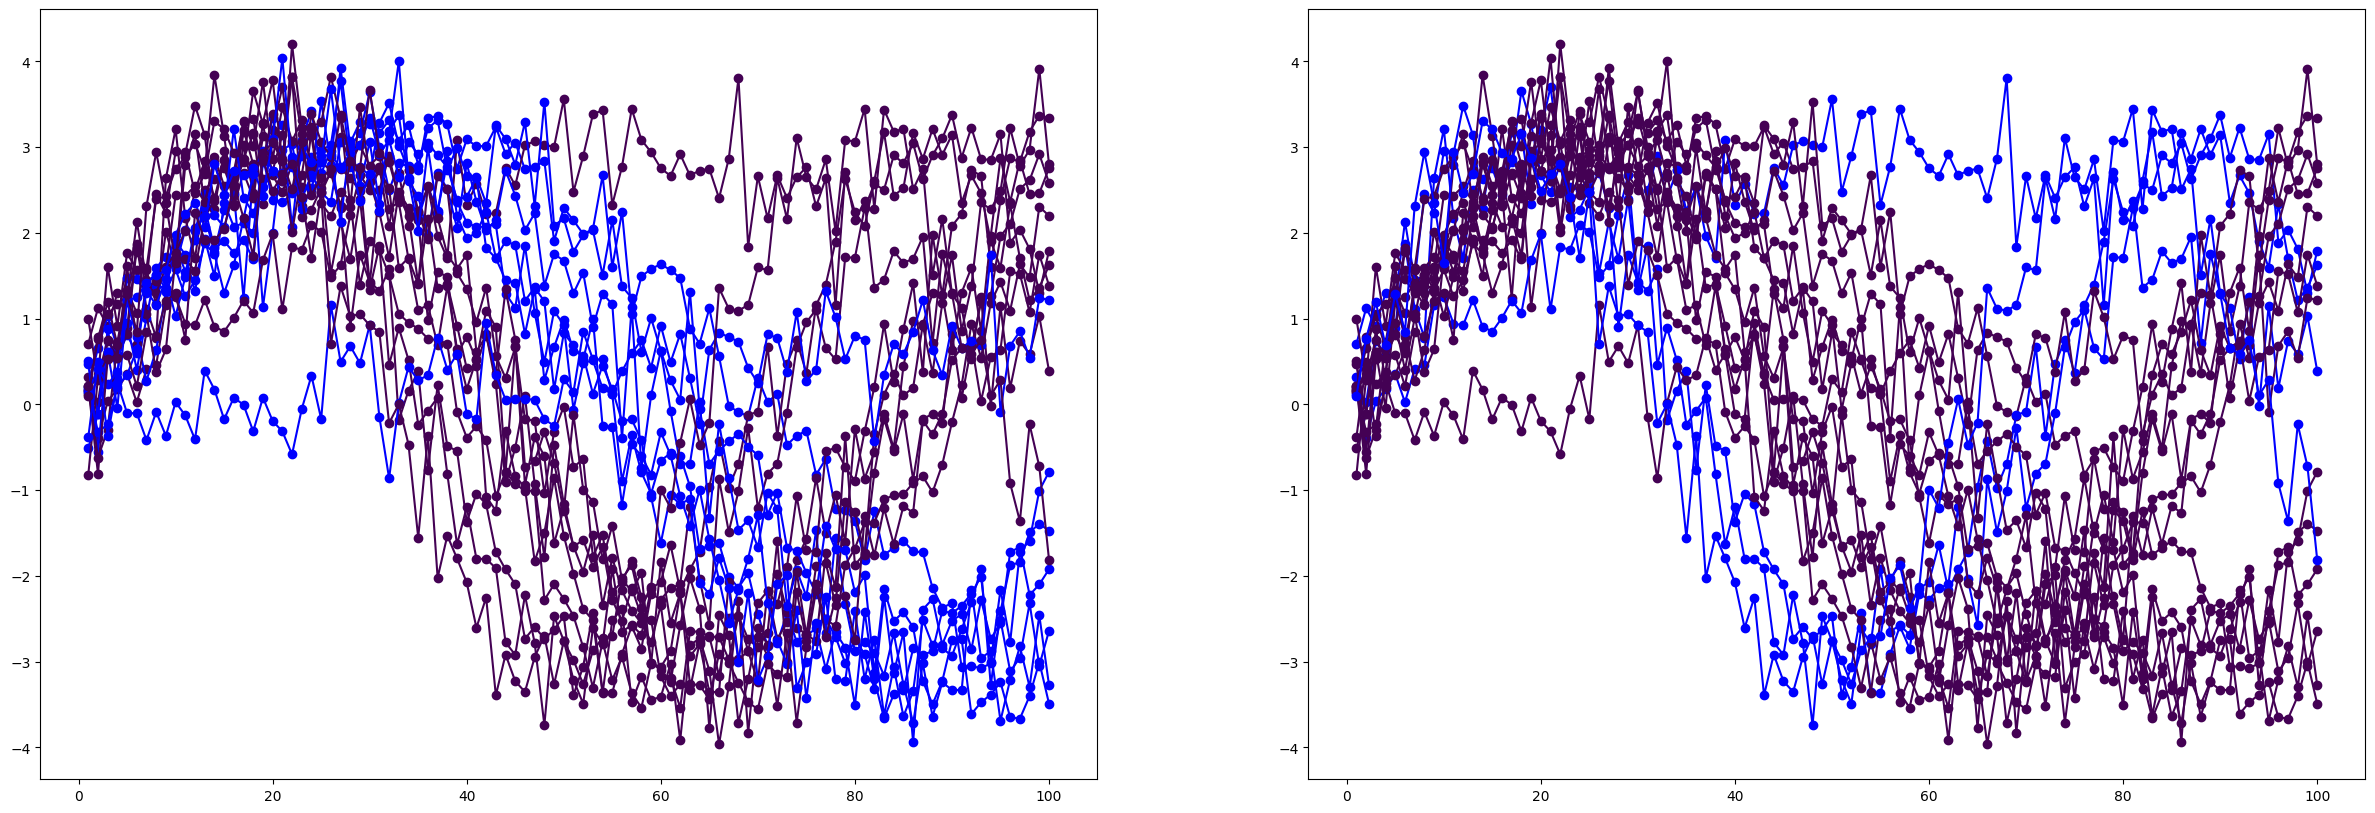

In [17]:
plotter.compare_clusters(model4.dataset, labels, [0], [0, 9, 18, 30, 36, 39, 45], [3, 6, 15, 48])

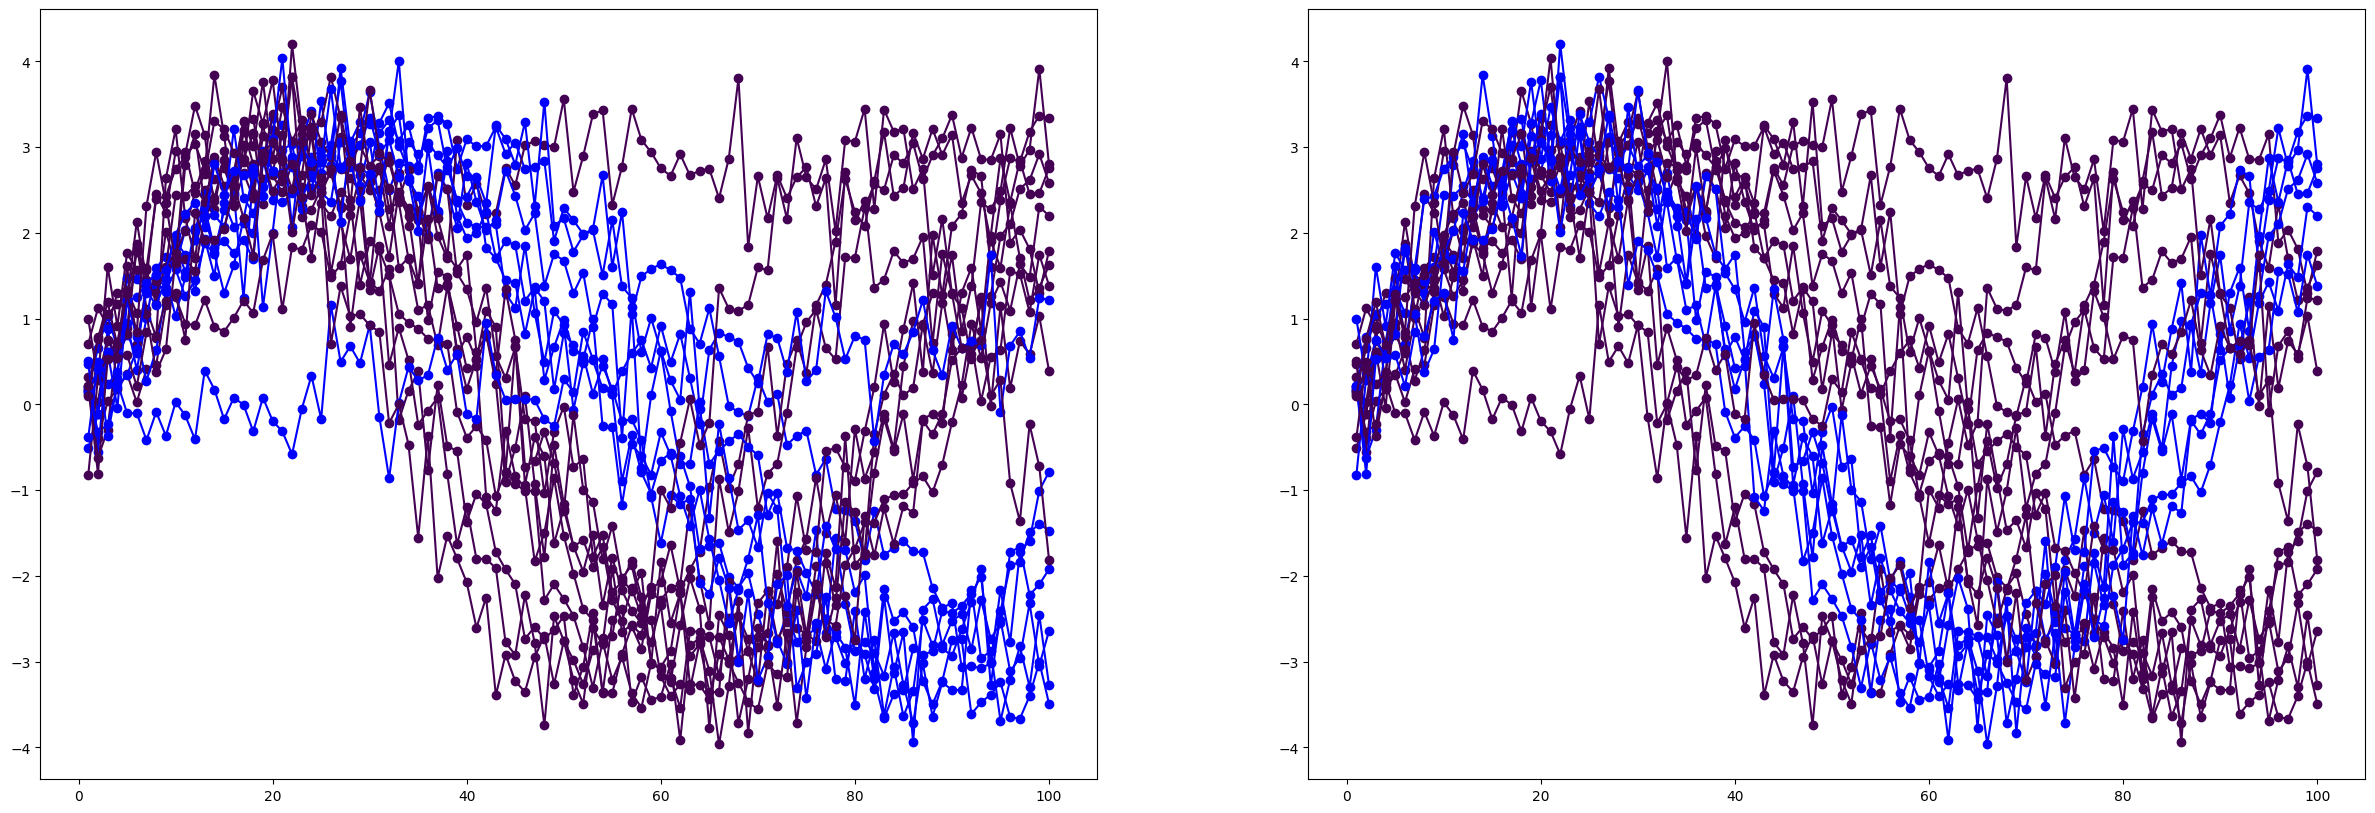

In [18]:
plotter.compare_clusters(model4.dataset, labels, [0], [0, 9, 18, 30, 36, 39, 45], [12, 21, 24, 27, 33, 42])

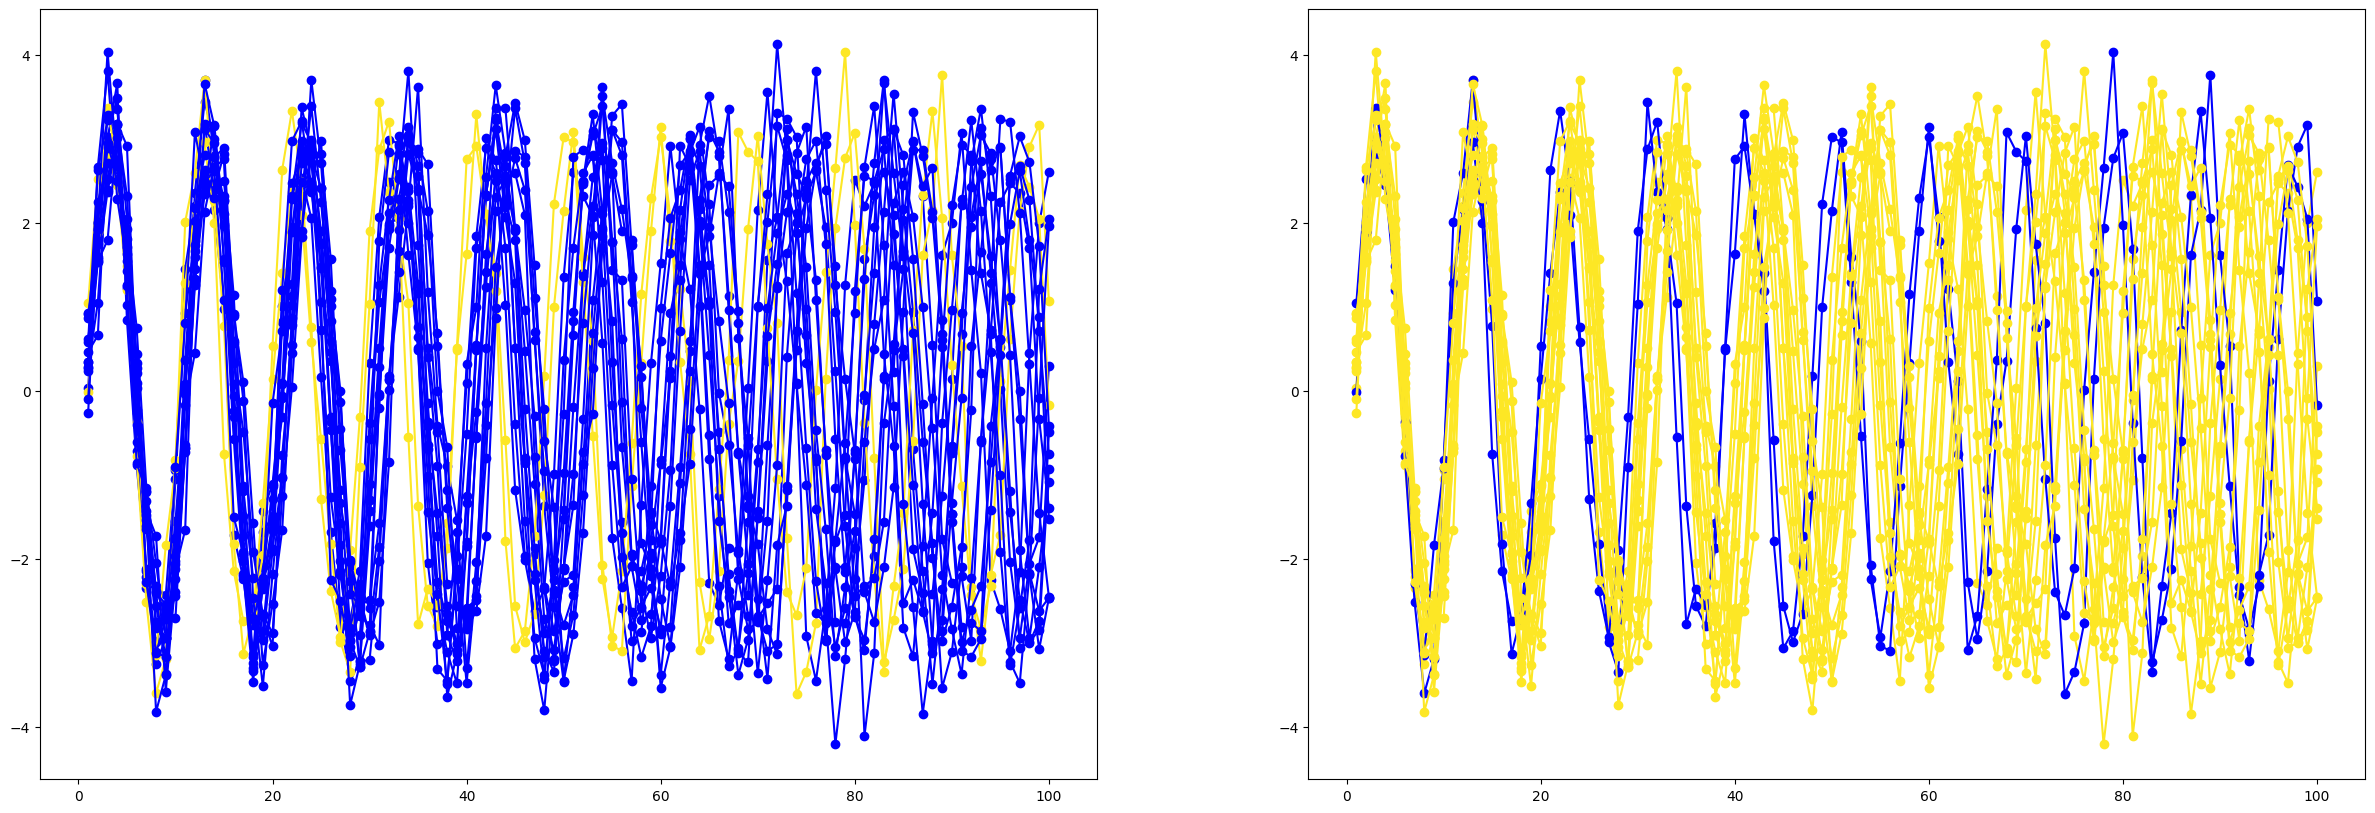

In [19]:
plotter.compare_clusters(model4.dataset, labels, [2], [2, 5, 8, 11, 17, 23, 26, 29, 32, 35, 38, 41, 44, 47], [14, 20])